In [77]:

import TickLoader

import numpy as np
import pandas as pd
import datetime as dt
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from IPython import get_ipython
import matplotlib.mlab as mlab
import itertools 


In [69]:
'''
Y = Z8 arb
X1=KZUS
X2=KZUK
X3=KZBox
X4=US
X5=UK


'''

'\nY = Z8 arb\nX1=KZUS\nX2=KZUK\nX3=KZBox\nX4=US\nX5=UK\n\n\n'

In [102]:
data=pd.read_csv('cocoa_data_20180312.csv')
data=data.dropna(axis=0, how='any')
data['arb']=data['usk8']-data['ukk8']
data.head(5)
data['hedged_arb']=data['usk8']*1.02048-data['ukk8']

/home/local/TMG/samuel.kalt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/home/local/TMG/samuel.kalt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys


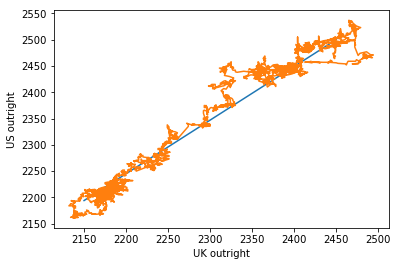

a = 0.000000
b = 1.020480
R-squared: 0.969313


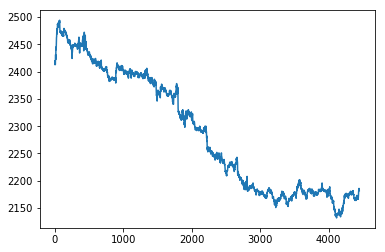

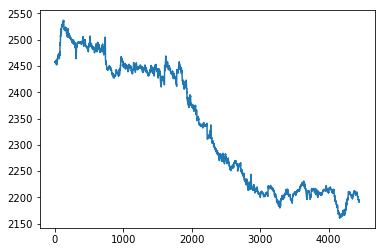

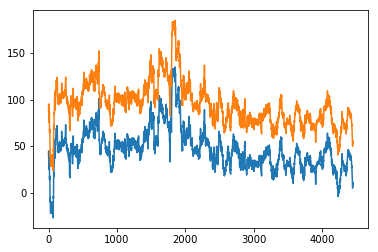

In [103]:
#Linear regressions
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# US outright
Y=data['usk8'].reshape(-1,1)
X=data['ukk8'].reshape(-1,1)

regressor=LinearRegression(fit_intercept=False)
regressor.fit(X,Y)
xx=np.linspace(2150,2450,100)
yy=regressor.predict(xx.reshape(xx.shape[0],1))


plt.plot(xx, yy)
plt.plot(X,Y)
plt.xlabel('UK outright')
plt.ylabel('US outright')
plt.show()


print 'a = %1f' %regressor.intercept_
print 'b = %4f' %regressor.coef_
print 'R-squared: %4f' %regressor.score(X,Y)

plt.plot(X)
plt.show()
plt.plot(Y)
plt.show()
plt.plot(data['arb'])
plt.plot(data['hedged_arb'])
plt.show()



/home/local/TMG/samuel.kalt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/home/local/TMG/samuel.kalt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys


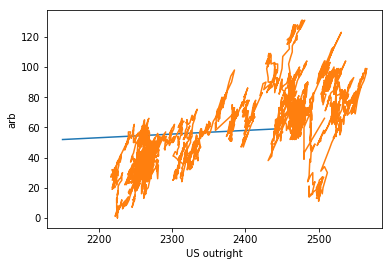

a = 0.000000
b = 0.024161
R-squared: 0.166703


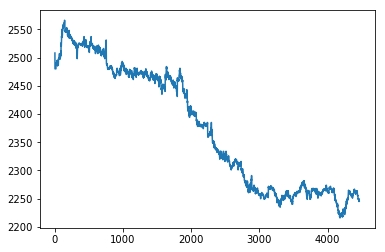

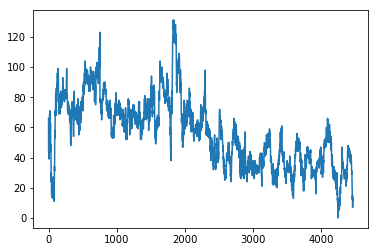

In [88]:
#Linear regressions
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# US outright
Y=data['Arb'].reshape(-1,1)
X=data['US'].reshape(-1,1)

regressor=LinearRegression(fit_intercept=False)
regressor.fit(X,Y)
xx=np.linspace(2150,2450,100)
yy=regressor.predict(xx.reshape(xx.shape[0],1))


plt.plot(xx, yy)
plt.plot(X,Y)
plt.xlabel('US outright')
plt.ylabel('arb')
plt.show()


print 'a = %1f' %regressor.intercept_
print 'b = %4f' %regressor.coef_
print 'R-squared: %4f' %regressor.score(X,Y)

plt.plot(X)
plt.show()
plt.plot(Y)
plt.show()

/home/local/TMG/samuel.kalt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/home/local/TMG/samuel.kalt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys


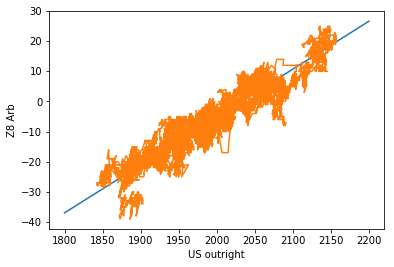

a = -323.324258
b = 0.159077
R-squared: 0.896756


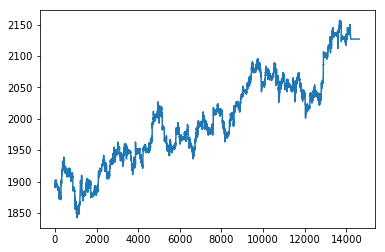

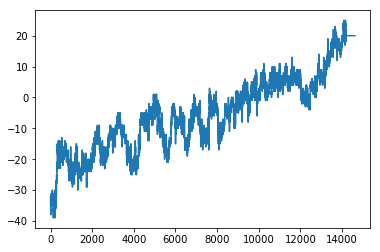

In [71]:
#Linear regressions
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# US outright
Y=data['Z8 Arb'].reshape(-1,1)
X=data['USK8'].reshape(-1,1)

regressor=LinearRegression()
regressor.fit(X,Y)
xx=np.linspace(1800,2200,100)
yy=regressor.predict(xx.reshape(xx.shape[0],1))


plt.plot(xx, yy)
plt.plot(X,Y)
plt.xlabel('US outright')
plt.ylabel('Z8 Arb')
plt.show()


print 'a = %1f' %regressor.intercept_
print 'b = %4f' %regressor.coef_
print 'R-squared: %4f' %regressor.score(X,Y)

plt.plot(X)
plt.show()
plt.plot(Y)
plt.show()

/home/local/TMG/samuel.kalt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/home/local/TMG/samuel.kalt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


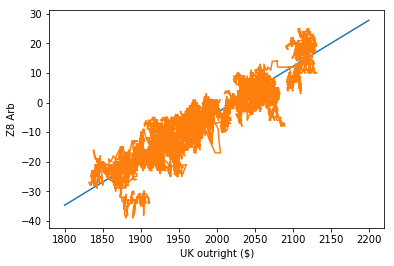

a = -316.168665
b = 0.156368
R-squared: 0.866220


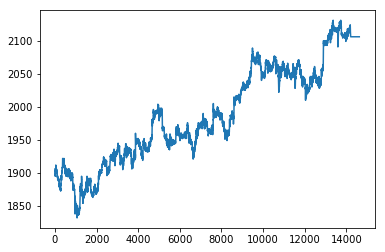

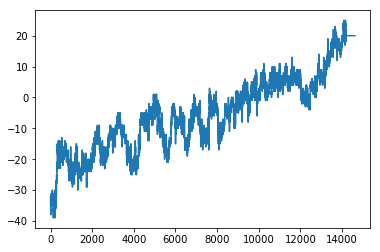

In [72]:
# UK outright
Y=data['Z8 Arb'].reshape(-1,1)
X=data['UKK8'].reshape(-1,1)

regressor=LinearRegression()
regressor.fit(X,Y)
xx=np.linspace(1800,2200,100)
yy=regressor.predict(xx.reshape(xx.shape[0],1))


plt.plot(xx, yy)
plt.plot(X,Y)
plt.xlabel('UK outright ($)')
plt.ylabel('Z8 Arb')
plt.show()


print 'a = %1f' %regressor.intercept_
print 'b = %4f' %regressor.coef_
print 'R-squared: %4f' %regressor.score(X,Y)

plt.plot(X)
plt.show()
plt.plot(Y)
plt.show()

/home/local/TMG/samuel.kalt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/home/local/TMG/samuel.kalt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


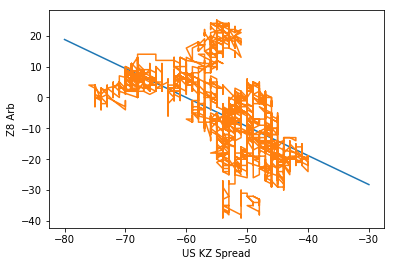

a = -56.390930
b = -0.939428
R-squared: 0.342970


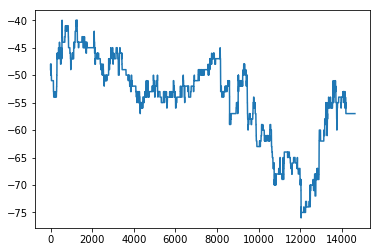

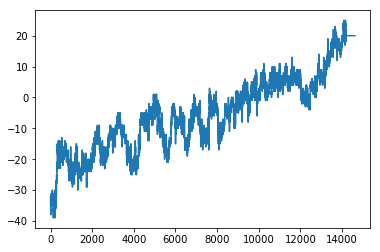

In [73]:
# US KZ
Y=data['Z8 Arb'].reshape(-1,1)
X=data['US_KZ'].reshape(-1,1)

regressor=LinearRegression()
regressor.fit(X,Y)
xx=np.linspace(-80,-30,100)
yy=regressor.predict(xx.reshape(xx.shape[0],1))


plt.plot(xx, yy)
plt.plot(X,Y)
plt.xlabel('US KZ Spread')
plt.ylabel('Z8 Arb')
plt.show()


print 'a = %1f' %regressor.intercept_
print 'b = %4f' %regressor.coef_
print 'R-squared: %4f' %regressor.score(X,Y)

plt.plot(X)
plt.show()
plt.plot(Y)
plt.show()

/home/local/TMG/samuel.kalt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/home/local/TMG/samuel.kalt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


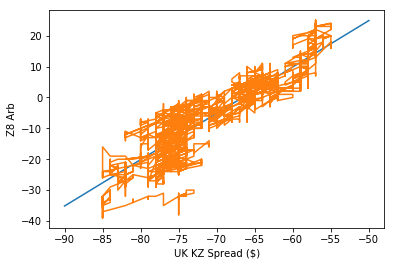

a = 99.967567
b = 1.501264
R-squared: 0.815480


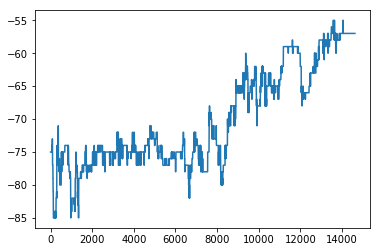

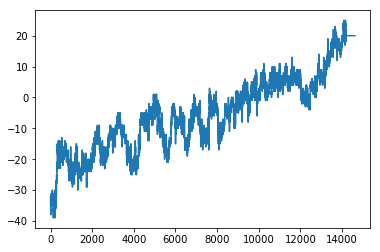

In [74]:
# UK KZ
Y=data['Z8 Arb'].reshape(-1,1)
X=data['UK_KZ'].reshape(-1,1)

regressor=LinearRegression()
regressor.fit(X,Y)
xx=np.linspace(-90,-50,100)
yy=regressor.predict(xx.reshape(xx.shape[0],1))


plt.plot(xx, yy)
plt.plot(X,Y)
plt.xlabel('UK KZ Spread ($)')
plt.ylabel('Z8 Arb')
plt.show()


print 'a = %1f' %regressor.intercept_
print 'b = %4f' %regressor.coef_
print 'R-squared: %4f' %regressor.score(X,Y)

plt.plot(X)
plt.show()
plt.plot(Y)
plt.show()

/home/local/TMG/samuel.kalt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/home/local/TMG/samuel.kalt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


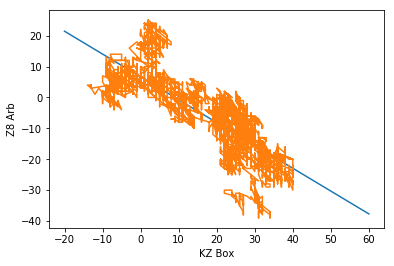

a = 6.651877
b = -0.739356
R-squared: 0.674936


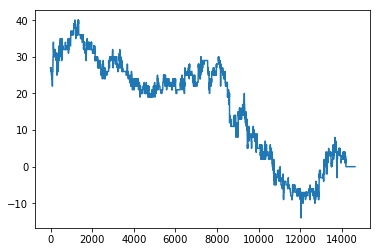

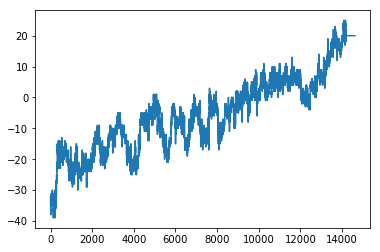

In [75]:
# KZ box
Y=data['Z8 Arb'].reshape(-1,1)
X=data['KZ_Box'].reshape(-1,1)

regressor=LinearRegression()
regressor.fit(X,Y)
xx=np.linspace(-20,60,100)
yy=regressor.predict(xx.reshape(xx.shape[0],1))


plt.plot(xx, yy)
plt.plot(X,Y)
plt.xlabel('KZ Box')
plt.ylabel('Z8 Arb')
plt.show()


print 'a = %1f' %regressor.intercept_
print 'b = %4f' %regressor.coef_
print 'R-squared: %4f' %regressor.score(X,Y)

plt.plot(X)
plt.show()
plt.plot(Y)
plt.show()